# Final project

## The main objective is to forescast  the sells in november for store number 5

### Do what would make sense?

Month, itens and stores. Some itens can be more sold in some stores in specific months.

How can I found this?

01. To find sells by item, month and store. 
02. To find the stores that likely target store.
03. To do some encoding in categorical variables. 




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook

In [2]:
from IPython.core.display import display, HTML


## Reading the data

In [3]:
#import data
df_i = pd.read_csv('items.csv')
df_s = pd.read_csv('shops.csv')
df_ic = pd.read_csv('item_categories.csv')
df_st = pd.read_csv('sales_train.csv.gz', compression='gzip')
df_ts = pd.read_csv('test.csv.gz', compression='gzip')
df_ss = pd.read_csv('sample_submission.csv.gz', compression='gzip')



In [4]:
def glimpse_data(df,title):
    first_row = '=' * 30 + title + 30 * '='
    
    
    str_html = (
        '<h2>%s</h2>'
        '<ul><li>Shape: %s</li>' 
        '<li>Head <br/>%s</li>'  
        '<li>Data types <br/>%s</li>'
        '<li>Unique values <br/>%s</li>'
        '</ul>'
    %(str(title),
      str(df.shape),
      str(df.head().to_html()), 
      str(pd.DataFrame(df.dtypes,columns=['tipo']).to_html()),
      str(pd.DataFrame(df.nunique(),columns=['qtd']).to_html())
     )
    )
    display(HTML(str_html))


In [5]:
l = list(df_ic.item_category_name)
l_cat = l

for ind in range(1,8):
    l_cat[ind] = 'Access'

for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,25):
    l_cat[ind] = 'Consoles Games'

for ind in range(26,28):
    l_cat[ind] = 'phone games'

for ind in range(28,32):
    l_cat[ind] = 'CD games'

for ind in range(32,37):
    l_cat[ind] = 'Card'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'


df_ic['cats'] = l_cat


In [6]:
#A glimpse on dataframes
glimpse_data(df_ts, 'Test (df_ts)')
glimpse_data(df_ss, 'Sample submission (df_ss)')
glimpse_data(df_i,'Items (df_i)')
glimpse_data(df_s, 'Shops (df_s)')
glimpse_data(df_ic, 'Items categories (df_ic)')
glimpse_data(df_st, 'Sales train (df_st)')



### Type of data in Sales train 
<ul>
    <li>date: date</li>
    <li>date_block_num: categorical</li>
    <li>shop_id: categorical</li>
    <li>item_id: categorical</li>
    <li>item_price: numerical</li>
    <li> item_cnt_day: numerical</li>
</ul>


In [7]:
print(df_st.date.min() + ' until ' +df_st.date.max())
print(sorted(df_st.shop_id.unique()))

01.01.2013 until 31.12.2014
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [8]:
df = df_st.copy()
#A first work with data

#df['day'] = df_st['date'].apply(lambda x: int(x.split('.')[0]))
#df['month'] = df_st['date'].apply(lambda x: int(x.split('.')[1]))
#df['year'] = df_st['date'].apply(lambda x: int(x.split('.')[2]))
#df['ttl_item'] = df_st['item_price'] * df_st['item_cnt_day']
#df['dt'] = pd.to_datetime(df_st['date'],infer_datetime_format=True,dayfirst=True)


In [10]:
df_month = df.groupby(['date_block_num','item_id','shop_id'])['item_cnt_day'].sum().reset_index()

In [ ]:
df_month.plot()

In [11]:

df_todos_meses = pd.DataFrame(columns=['ID', 'shop_id', 'item_id','date_block_num'])


In [12]:
df_month_ttl = pd.merge(df_todos_meses,df_month,how='left',on = ['item_id','shop_id','date_block_num'])

In [13]:
df_month_ttl['target_clip'] = df_month_ttl.item_cnt_day.fillna(0).clip(0,20)


In [14]:
df_month_ttl.head()

,ID,date_block_num,item_id,shop_id,item_cnt_day,target_clip


In [15]:
df_month_ttl['target_clip_ant'] = df_month_ttl.sort_values(['shop_id','item_id','date_block_num'])['target_clip'].shift()

,ID,date_block_num,item_id,shop_id,item_cnt_day,target_clip,target_clip_ant


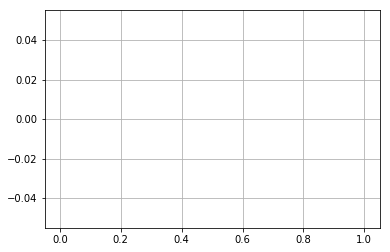

In [16]:
df_month_ttl.target_clip.hist()
df_month_ttl.head()

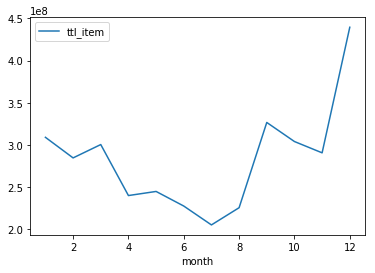

In [10]:
df.groupby('month',as_index=False)['ttl_item'].sum().plot(x='month',y='ttl_item')

In [11]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,ttl_item,dt
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013,999.00,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013,899.00,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013,-899.00,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013,1709.05,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013,1099.00,2013-01-15


In [12]:
df_m = df.groupby(['year','month','shop_id','item_id'],as_index=False)['ttl_item'].sum()

In [13]:
for s in df_m.shop_id.sort_values().unique():
    display(HTML(str(s)))
    display(HTML(df_m[(df_m['month'] == 11) & (df_m.shop_id == s)].groupby('year').sum().to_html()))
    

,month,shop_id,item_id,ttl_item
year,,,,


,month,shop_id,item_id,ttl_item
year,,,,


,month,shop_id,item_id,ttl_item
year,,,,
2013,4048,736,3279978,1.791376e+06
2014,4752,864,3770092,2.128066e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,5841,1593,5093695,1214214.0
2014,5907,1611,4982903,1445621.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,7909,2876,7032595,1.745031e+06
2014,6930,2520,6135816,1.472409e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,8514,3870,8161682,1492865.0
2014,8107,3685,7791216,1750290.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,17556,9576,16983118,4.711449e+06
2014,13816,7536,13320368,4.501168e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,11748,7476,11405365,3160150.0
2014,10109,6433,9304539,3041378.0


,month,shop_id,item_id,ttl_item
year,,,,


,month,shop_id,item_id,ttl_item
year,,,,


,month,shop_id,item_id,ttl_item
year,,,,
2013,5456,4960,4467763,1033215.00
2014,4202,3820,3512286,903158.39


,month,shop_id,item_id,ttl_item
year,,,,


,month,shop_id,item_id,ttl_item
year,,,,
2013,8030,8760,7756764,5.079118e+06
2014,7777,8484,7437781,5.929746e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,6468,7644,7130030,482131.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,7029,8946,6048726,2245940.0
2014,6919,8806,6248385,2465137.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,11264,15360,11161660,3.023995e+06
2014,9427,12855,8899670,3.137832e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,9581,13936,9187397,2.206190e+06
2014,8558,12448,7976411,2.374662e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,8283,12801,7535054,1.990345e+06
2014,7546,11662,6915176,1.854224e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,9515,15570,8543890,4.522620e+06
2014,6820,11160,6039661,2.893619e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,13200,22800,12881353,2719533.0
2014,10912,18848,10503982,2622795.0


,month,shop_id,item_id,ttl_item
year,,,,


,month,shop_id,item_id,ttl_item
year,,,,
2013,12518,23898,13062509,2.088720e+06
2014,11363,21693,11150718,2.913178e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,8382,16764,7583900,3.106766e+06
2014,7227,14454,6857688,2.643843e+06


,month,shop_id,item_id,ttl_item
year,,,,


,month,shop_id,item_id,ttl_item
year,,,,
2013,10901,23784,9868391,3.188200e+06
2014,8943,19512,7708482,3.128656e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,33044,75100,33823187,8248853.0
2014,26235,59625,27088061,9408434.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,10934,25844,10406651,2847627.0
2014,8437,19942,7632820,2978387.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,18260,44820,17454984,4758755.0
2014,16742,41094,16156042,6154330.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,22957,58436,23271425,5.927962e+06
2014,19140,48720,18974251,6.369623e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,10659,28101,10591637,2758576.0
2014,9581,25259,9270593,2590108.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,13486,36780,13687770,2751549.0
2014,10560,28800,10462393,2390603.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,36751,103571,38637978,9.652479e+06
2014,31020,87420,33041000,1.042961e+07


,month,shop_id,item_id,ttl_item
year,,,,


,month,shop_id,item_id,ttl_item
year,,,,
2014,5588,16764,5140811,785264.0


,month,shop_id,item_id,ttl_item
year,,,,
2014,2772,8568,2484342,656106.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,11979,38115,11509856,3070905.0
2014,10868,34580,10035381,3369512.0


,month,shop_id,item_id,ttl_item
year,,,,


,month,shop_id,item_id,ttl_item
year,,,,
2013,6842,23014,6246737,1676898.0
2014,6875,23125,5782424,2279666.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,8580,29640,7914670,2.556136e+06
2014,7700,26600,6586423,3.162088e+06


,month,shop_id,item_id,ttl_item
year,,,,
2014,5599,19851,5377630,1247764.0


,month,shop_id,item_id,ttl_item
year,,,,
2014,2552,9280,2881709,401750.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,10373,38663,10016785,2.614265e+06
2014,7403,27593,6899333,1.579154e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,17325,66150,17202441,6.004046e+06
2014,17435,66570,17655018,6.959797e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,9647,37711,9005971,3.636711e+06
2014,8822,34486,8163293,4.695688e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,10307,41228,10606561,1388476.0
2014,7381,29524,7468053,1477916.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,8921,36495,8513926,2.093899e+06
2014,6809,27855,6301753,1.650674e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,13420,56120,13263112,3.191612e+06
2014,10538,44068,9872033,3.521356e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,10571,45167,9497022,2.342341e+06
2014,11319,48363,10289146,3.706991e+06


,month,shop_id,item_id,ttl_item
year,,,,
2014,8613,37584,7963596,2012362.0


,month,shop_id,item_id,ttl_item
year,,,,
2014,5445,24255,4909932,1098922.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,15917,72350,15661564,4.260526e+06
2014,7865,35750,7561247,2.195106e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,11088,51408,11353978,1094860.00
2014,8118,37638,8122649,734237.68


,month,shop_id,item_id,ttl_item
year,,,,
2013,9834,46488,9510405,2.397702e+06
2014,8393,39676,7639633,1.918169e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,10197,49131,9583362,2.344547e+06
2014,9339,44997,8680111,2.442307e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,31504,154656,33397967,6303942.0
2014,24024,117936,25156369,6656201.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,4169,20845,2055480,560339.91
2014,6897,34485,3866221,3600256.40


,month,shop_id,item_id,ttl_item
year,,,,
2013,16973,86408,18009496,2.404554e+06
2014,14630,74480,15189355,2.355505e+06


,month,shop_id,item_id,ttl_item
year,,,,
2013,22869,118503,23963430,3705165.0
2014,17424,90288,17922215,3526914.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,13651,71978,14010330,2084906.0
2014,11803,62234,12137941,2198128.0


,month,shop_id,item_id,ttl_item
year,,,,
2013,9559,51271,9419716,2.185949e+06
2014,8063,43247,7405020,2.278886e+06


## Visualizing total sales on the time

In [14]:
#making monthly table
dfg_d = df_st.groupby(['dt'])
#dfg_m = df_st.groupby(['month','year','date_block_num','shop_id','item_id'])


KeyError: 'dt'

In [ ]:
df_soma = dfg_d.sum().reset_index()

In [ ]:
p = df_soma.plot('dt','ttl_item',figsize=(21,10))
p.plot()

In [ ]:
#What's happen in the ends of 2013?

In [ ]:
print(df_soma.loc[df_soma['ttl_item'].idxmax()])

In [ ]:
df_soma.sort_values('ttl_item').head(5)

In [ ]:
df_soma.sort_values('ttl_item',ascending=False).head(5)

In [ ]:
df_soma.sort_values('item_cnt_day',ascending=False).head(5)

In [ ]:
df_soma.plot('dt','item_cnt_day',figsize=(21,10))

In [ ]:
df_st[df_st['dt'] == '2013-11-29'].sort_values('ttl_item',ascending=False).shape

In [ ]:
#investigating item 6675 price oscilation

a = df_st[df_st['item_id'] == 6675].groupby(['date'])

In [ ]:
a.max().plot('dt','item_price',figsize=(21,10))

In [ ]:
a.max().dt.min()

In [ ]:
#The max value of sales is because product 6675 launch
df_i[df_i.item_id == 6675]

In [ ]:
#Wow, Sony should have been happy with ps4

In [ ]:
a = df_st.groupby('date_block_num')

In [ ]:
a.sum().reset_index().plot('date_block_num','ttl_item',figsize=(21,10))

In [ ]:
a.sum().reset_index().plot('date_block_num','item_cnt_day',figsize=(21,10))

In [ ]:
a = df_st.groupby(['shop_id'])
b = a.sum()[['ttl_item','item_cnt_day']].reset_index()
b.dtypes

In [ ]:

fig = plt.figure()
ax = plt.subplot()
markers = ['o','x','<']
len(colors)
for i in range(3):
    colors = b[b['shop_id']%3 == i].iloc[:,1].values * 4
    p = b[b['shop_id'] % 3 == i].plot.scatter('item_cnt_day','ttl_item',s=100,cmap=plt.cm.seismic,c=colors,marker=markers[i], ax=ax,figsize=(15,15))
    
p.plot()

In [ ]:
#Linhas shop id, colunas meses
a = df_st.groupby(['shop_id','month'])

b = a.sum()[['ttl_item']].transpose().stack(0).reset_index()




In [ ]:
c = b.drop(['level_0','shop_id'],axis=1)

In [ ]:
c.head()

In [ ]:
plt.figure(figsize=(200,500))
plt.imshow(c, interpolation='nearest', cmap=plt.cm.magma)
plt.savefig('teste.png')